<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff


drive.mount('/content/drive')
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
gws.head()


,name,Id,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Lennon,2,0,3,0,0,0,6,0,1,2,0.3,0,0,142,0,0,3,0,0,0,0.9,8.2,0,2016-08-13T14:00:00Z,13/08/20 15:00,0,0,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,0,1,0,0,0,60,TRUE,0,0,1
1,Aaron_Ramsey,3,0,26,0,0,0,5,0,2,22,4.9,1,0,16,0,0,8,0,3,0,3,2.2,0,2016-08-14T15:00:00Z,14/08/20 16:00,0,0,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,23,2,0,0,0,80,TRUE,0,0,1
2,Abel_Hernández,6,1,15,0,0,0,10,0,0,10,12.2,0,0,163,0,0,4,1,1,0,5.7,14.4,1,2016-08-13T11:30:00Z,13/08/20 12:30,0,0,90,1,0,8,0,0,0,0,1,0,1,0,26039,2,0,2,1,2,30,5,0,0,0,60,TRUE,0,0,1
3,Adama_Diomande,7,0,28,0,0,2,29,0,3,20,16.8,3,0,164,0,1,4,1,1,1,10.7,45.2,1,2016-08-13T11:30:00Z,13/08/20 12:30,0,0,90,0,0,8,0,0,0,0,6,0,1,0,38151,6,0,0,1,2,45,8,0,0,0,45,TRUE,0,0,1
4,Adam_Clayton,8,0,37,0,0,0,6,0,4,31,2.2,0,0,283,0,0,6,4,1,0,1.4,3.2,0,2016-08-13T14:00:00Z,13/08/20 15:00,0,0,90,0,0,14,0,0,0,0,2,0,1,0,17663,1,0,1,1,1,9,2,0,0,0,45,TRUE,0,0,1


In [3]:
gws=gws.astype({'name':'category','assists':int, 'attempted_passes':int, 'big_chances_created':int,
       'big_chances_missed':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'clearances_blocks_interceptions':int, 'completed_passes':int, 'creativity':float,
       'dribbles':int, 'ea_index':int, 'element':int, 'errors_leading_to_goal':int,
       'errors_leading_to_goal_attempt':int, 'fouls':int, 'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'influence':float, 'key_passes':int,
      'loaned_in':int, 'loaned_out':int,'minutes':int, 'offside':int, 'open_play_crosses':int, 'opponent_team':int, 'own_goals':int,
       'penalties_conceded':int, 'penalties_missed':int, 'penalties_saved':int,
       'recoveries':int, 'red_cards':int, 'round':int, 'saves':int, 'selected':int, 'tackled':int,
       'tackles':int, 'target_missed':int, 'team_a_score':int, 'team_h_score':int, 'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
       'value':int,'winning_goals':int, 'yellow_cards':int,'GW':int
      })

In [4]:
gws.drop(['kickoff_time','ea_index'], axis=1,inplace=True)

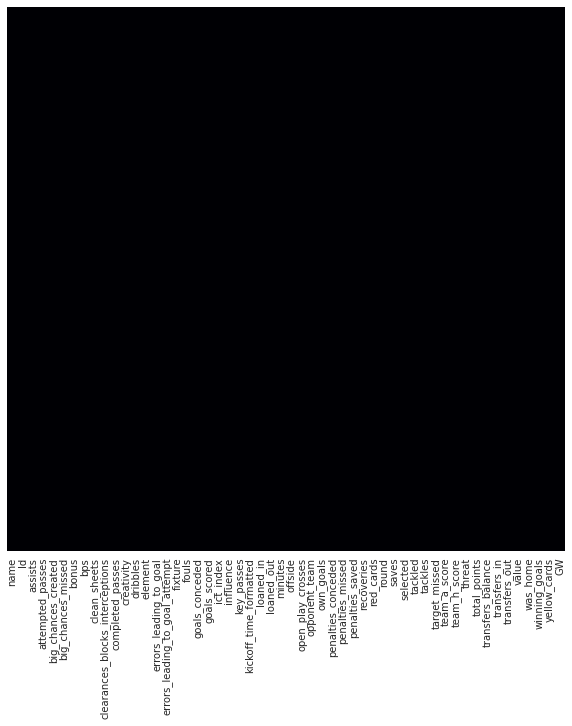

In [5]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False,cmap='inferno',)

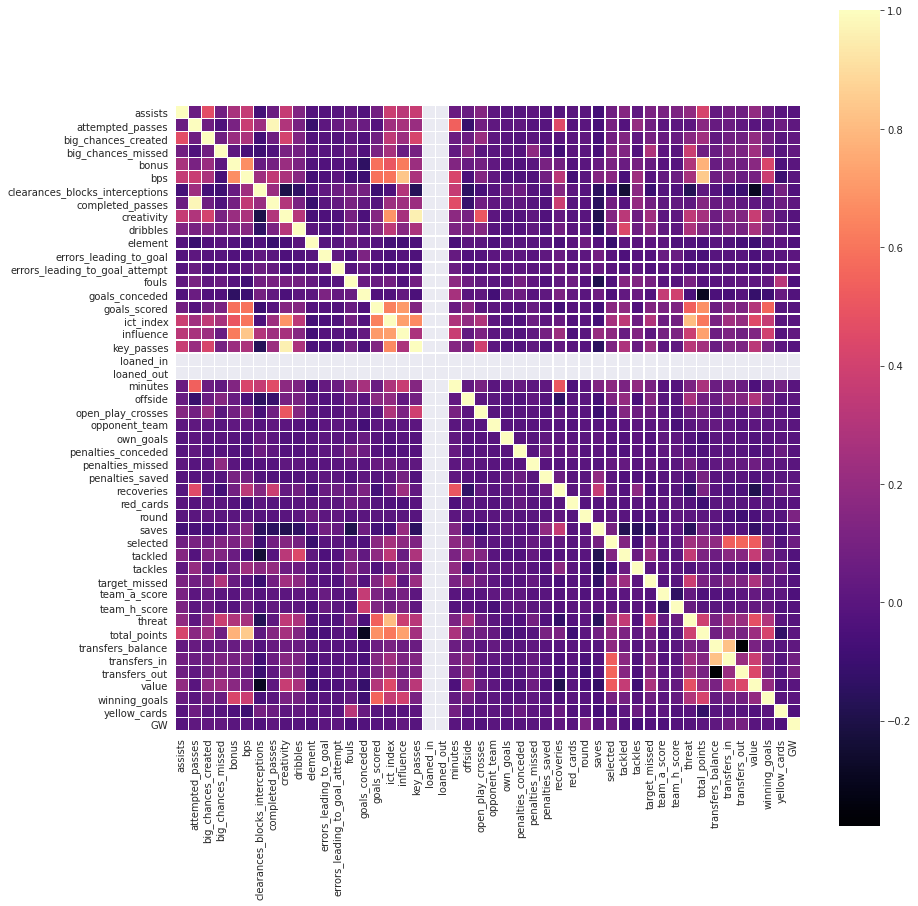

In [6]:
plt.figure(figsize=(14,15))
sns.heatmap(gws.corr(),cmap='magma',square=True, linewidths=0.2)

In [7]:
gws['kickoff_time_formatted']=pd.to_datetime(gws['kickoff_time_formatted'])

In [8]:
def was_home(x):
  if x=="FALSE":
    return 0
  else:
    return 1

In [9]:
gws['home']=gws['was_home'].apply(was_home)

In [10]:
gws.drop('was_home',axis=1, inplace=True)

In [11]:
gws['kickoff_time'] = gws.kickoff_time_formatted.dt.hour


In [12]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'

In [13]:
gws['kickoff_time']=gws['kickoff_time'].apply(time)


In [14]:
gws.drop(['kickoff_time_formatted'],axis=1,inplace=True)


In [15]:
gws.drop(['element','Id'],axis=1,inplace=True)

In [16]:
gws.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,winning_goals,yellow_cards,GW,home,kickoff_time
0,Aaron_Lennon,0,3,0,0,0,6,0,1,2,0.3,0,0,0,3,0,0,0,0.9,8.2,0,0,0,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,0.0,1,0,0,0,60,0,0,1,1,1
1,Aaron_Ramsey,0,26,0,0,0,5,0,2,22,4.9,1,0,0,8,0,3,0,3.0,2.2,0,0,0,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,23.0,2,0,0,0,80,0,0,1,1,1
2,Abel_Hernández,1,15,0,0,0,10,0,0,10,12.2,0,0,0,4,1,1,0,5.7,14.4,1,0,0,90,1,0,8,0,0,0,0,1,0,1,0,26039,2,0,2,1,2,30.0,5,0,0,0,60,0,0,1,1,0
3,Adama_Diomande,0,28,0,0,2,29,0,3,20,16.8,3,0,1,4,1,1,1,10.7,45.2,1,0,0,90,0,0,8,0,0,0,0,6,0,1,0,38151,6,0,0,1,2,45.0,8,0,0,0,45,0,0,1,1,0
4,Adam_Clayton,0,37,0,0,0,6,0,4,31,2.2,0,0,0,6,4,1,0,1.4,3.2,0,0,0,90,0,0,14,0,0,0,0,2,0,1,0,17663,1,0,1,1,1,9.0,2,0,0,0,45,0,0,1,1,1


In [17]:
from sklearn import preprocessing
scaler = preprocessing.scale(gws.drop(['name','total_points'],axis=1))
scaled=pd.DataFrame(scaler)
scaled
#scaler = preprocessing.StandardScaler()
#scaler.fit_transform(X.f3.values.reshape(-1, 1))

#scaled = scaler.fit(gws.drop('name',axis=1))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.292020,-1.490038,-0.284943,-0.241983,-0.343233,-0.780223,-0.581825,-0.614697,-1.292076,-0.775482,-0.607942,-0.110011,-0.139076,-1.705590,-0.813757,-0.958025,-0.297618,-0.887762,-0.580642,-0.657621,0.0,0.0,-2.490819,-0.319294,-0.407707,1.127807,-0.057092,-0.096573,-0.049936,-0.042848,-1.146290,-0.063455,-1.672491,-0.234068,-0.573597,-0.162360,1.240617,-0.548550,-0.146880,-0.430987,-0.672700,-0.107661,-0.393266,-0.457489,0.269025,-0.175561,-0.383438,-1.726710,1.002185,-0.175750
1,-0.292020,-0.393018,-0.284943,-0.241983,-0.343233,-0.872519,-0.581825,-0.339407,-0.258579,-0.459226,0.211704,-0.110011,-0.139076,-1.660064,-0.813757,1.530717,-0.297618,-0.305996,-0.974996,-0.657621,0.0,0.0,-0.650469,-0.319294,-0.407707,-0.260518,-0.057092,-0.096573,-0.049936,-0.042848,-0.836493,-0.063455,-1.672491,-0.234068,-0.160181,0.440643,-0.660652,0.933129,2.338138,1.073667,0.568751,-0.107661,-0.393266,-0.457489,1.613844,-0.175561,-0.383438,-1.726710,1.002185,-0.175750
2,2.868694,-0.917680,-0.284943,-0.241983,-0.343233,-0.411041,-0.581825,-0.889988,-0.878677,0.042659,-0.607942,-0.110011,-0.139076,-1.696485,0.166743,-0.128444,-0.297618,0.441989,-0.173143,0.274021,0.0,0.0,0.576432,1.782904,-0.407707,-0.434059,-0.057092,-0.096573,-0.049936,-0.042848,-1.146290,-0.063455,-1.672491,-0.234068,-0.540023,0.440643,-0.660652,2.414807,-0.146880,0.321340,0.946583,-0.107661,-0.393266,-0.457489,0.269025,-0.175561,-0.383438,-1.726710,1.002185,-2.092752
3,-0.292020,-0.297625,-0.284943,-0.241983,2.444948,1.342576,-0.581825,-0.064117,-0.361929,0.358916,1.850997,-0.110011,6.867735,-1.696485,0.166743,-0.128444,2.635236,1.827147,1.851207,0.274021,0.0,0.0,0.576432,-0.319294,-0.407707,-0.434059,-0.057092,-0.096573,-0.049936,-0.042848,0.402693,-0.063455,-1.672491,-0.234068,-0.506473,2.852652,-0.660652,-0.548550,-0.146880,0.321340,1.756225,-0.107661,-0.393266,-0.457489,-0.739589,-0.175561,-0.383438,-1.726710,1.002185,-2.092752
4,-0.292020,0.131644,-0.284943,-0.241983,-0.343233,-0.780223,-0.581825,0.211174,0.206495,-0.644854,-0.607942,-0.110011,-0.139076,-1.678274,3.108246,-0.128444,-0.297618,-0.749247,-0.909270,-0.657621,0.0,0.0,0.576432,-0.319294,-0.407707,0.607185,-0.057092,-0.096573,-0.049936,-0.042848,-0.836493,-0.063455,-1.672491,-0.234068,-0.563223,-0.162360,-0.660652,0.933129,-0.146880,-0.430987,-0.186915,-0.107661,-0.393266,-0.457489,-0.739589,-0.175561,-0.383438,-1.726710,1.002185,-0.175750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19694,-0.292020,-1.013073,-0.284943,-0.241983,-0.343233,-1.241701,1.718730,-0.889988,-1.085376,-0.754856,1.031351,-0.110011,-0.139076,-0.958974,1.147244,-0.958025,-0.297618,-0.832356,-1.119592,-0.657621,0.0,0.0,0.003878,-0.319294,-0.407707,0.433644,-0.057092,-0.096573,-0.049936,-0.042848,-1.146290,-0.063455,-0.953416,-0.234068,-0.075573,1.646648,-0.660652,0.933129,-0.975219,-0.430987,0.028990,1.559764,1.470522,-0.287600,0.739712,-0.175561,-0.383438,1.682143,-0.997820,-0.175750
19695,2.868694,-1.060770,-0.284943,-0.241983,-0.343233,0.050437,-0.581825,-0.889988,-0.878677,-0.692980,1.031351,-0.110011,-0.139076,-0.995394,-0.813757,-0.958025,-0.297618,-0.887762,-0.922415,-0.657621,0.0,0.0,-2.204542,-0.319294,-0.407707,1.301348,-0.057092,-0.096573,-0.049936,-0.042848,-0.526697,-0.063455,-0.953416,-0.234068,0.695004,-0.765362,-0.660652,-0.548550,0.681459,1.825994,-0.456795,-1.260014,-0.221864,1.812843,0.874193,-0.175561,-0.383438,1.682143,1.002185,-2.092752
19696,-0.292020,1.657934,-0.284943,-0.241983,-0.343233,0.050437,-0.581825,0.211174,2.015114,-0.727356,-0.607942,-0.110011,-0.139076,-0.913448,0.166743,1.530717,-0.297618,-0.056668,-0.330884,-0.657621,0.0,0.0,0.576432,-0.319294,-0.407707,-1.301762,-0.057092,-0.096573,-0.049936,-0.042848,0.0

In [18]:
from sklearn.model_selection import train_test_split
X=(gws.drop(['name','total_points'],axis=1))
y=(gws['total_points'])
#X=scaled.drop(43,axis=1)
#y=scaled[43]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(X_train, y_train,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
model.coef_

array([ 1.47656529e+00,  1.50070647e-02, -4.87216646e-01,  5.35902395e-01,
        1.12065315e+00,  1.65784255e-01,  1.12871792e+00, -7.25705857e-02,
       -2.56455166e-02,  3.13150071e-02, -1.39022607e-01,  1.78856157e-01,
        1.15390236e-01, -5.89590225e-04,  1.39581380e-01, -2.64424340e-01,
        1.46874239e+00, -2.52804833e-01,  2.20676182e-02, -2.27102388e-01,
        4.26325641e-14, -4.34319247e-13,  7.14754567e-03,  9.66328511e-02,
       -1.63237713e-01, -8.78000123e-04, -1.34130296e+00,  4.08819137e-01,
       -9.80514235e-01,  2.29735163e+00, -5.23461778e-02, -1.30882288e+00,
        5.72615790e-03, -9.70818615e-02,  5.93220286e-08,  1.81066874e-01,
       -3.35775181e-01,  1.36541472e-01,  1.59533001e-03,  2.07492333e-02,
        2.29367674e-02, -3.32450155e-07, -8.62954662e-07, -1.30337576e-06,
       -3.34851361e-03, -8.39243227e-01, -5.04131510e-01,  2.02773522e-04,
        1.71626281e-02,  6.59366285e-03])

In [21]:
X_train.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'errors_leading_to_goal', 'errors_leading_to_goal_attempt',
       'fixture', 'fouls', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'key_passes', 'loaned_in', 'loaned_out', 'minutes',
       'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'winning_goals', 'yellow_cards', 'GW', 'home', 'kickoff_time'],
      dtype='object')

In [22]:
cdf=pd.DataFrame(model.coef_,X_train.columns,columns=['Coeff'])

In [23]:
cdf

,Coeff
assists,1.476565e+00
attempted_passes,1.500706e-02
big_chances_created,-4.872166e-01
big_chances_missed,5.359024e-01
bonus,1.120653e+00
bps,1.657843e-01
clean_sheets,1.128718e+00
clearances_blocks_interceptions,-7.257059e-02
completed_passes,-2.564552e-02
creativity,3.131501e-02


In [24]:
predict=model.predict(X_test)

In [25]:
predict

array([1.36470744, 2.24814844, 2.13978158, ..., 2.94824091, 3.79719608,
       1.67163005])

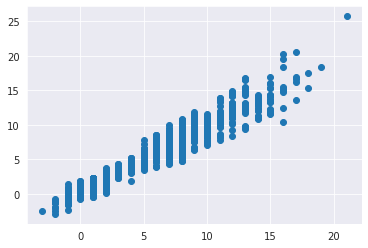

In [26]:
plt.scatter(y_test,predict)

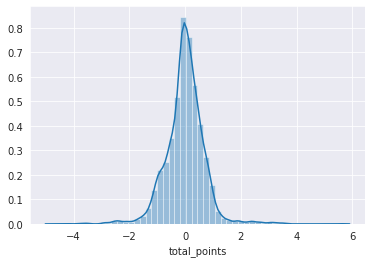

In [27]:
sns.distplot(y_test-predict)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))

MAE: 0.4871735897486601
MSE: 0.47615425959967744
RMSE 0.6900393174303022
R2 Score 0.9463909461038695


In [29]:
explained_variance_score(y_test,predict)

0.946398001560394

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predict})


In [31]:
df.head(50)

,Actual,Predicted
17036,0,1.364707
5426,2,2.248148
14173,1,2.139782
14582,1,1.503003
1730,2,2.350204
1444,11,8.531947
10439,2,1.732875
2448,1,1.123172
10423,2,1.544319
11782,2,1.153234


In [32]:
y=preprocessing.inverse_transform(scaled)


AttributeError: ignored

In [33]:
x_new=pd.read_csv('/content/drive/My Drive/gw1.csv',encoding = "ISO-8859-1")

In [34]:
x_new.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Cresswell_402,0,0,0,0,0,0,0,0,0,0.0,0,0,402,0,0,5,0,0,0,0.0,402,0.0,0,2018-08-12T12:30:00Z,12/08/20 13:30,0,0,0,0,0,12,0,0,0,0,0,0,1,0,103396,0,0,0,0,4,0,0,0,0,0,55,0,0,0,76
1,Aaron_Lennon_83,0,22,0,1,0,6,1,1,17,12.3,0,0,83,0,0,8,1,0,0,3.9,83,10.0,0,2018-08-12T12:30:00Z,12/08/20 13:30,0,0,90,0,1,16,0,0,0,0,2,0,1,0,15138,1,2,0,0,0,17,3,0,0,0,50,0,0,0,76
2,Aaron_Mooy_199,0,51,0,0,0,24,0,2,40,18.2,1,0,199,0,0,4,1,3,0,3.8,199,20.2,1,2018-08-11T14:00:00Z,11/08/20 15:00,0,0,90,0,0,6,0,0,0,0,11,0,1,0,192110,1,6,0,3,0,0,2,0,0,0,55,1,0,0,76
3,Aaron_Ramsey_14,0,11,0,0,0,7,0,0,7,10.8,1,0,14,0,0,1,0,1,0,2.9,14,9.4,1,2018-08-12T15:00:00Z,12/08/20 16:00,0,0,53,2,0,13,0,0,0,0,1,0,1,0,60423,0,2,0,2,0,9,1,0,0,0,75,1,0,0,76
4,Aaron_Wan-Bissaka_145,1,29,1,0,3,38,1,11,19,14.0,2,0,145,0,0,3,0,0,0,6.0,145,46.0,1,2018-08-11T14:00:00Z,11/08/20 15:00,0,0,90,0,0,9,0,0,0,0,7,0,1,0,652304,2,0,0,2,0,0,12,0,0,0,40,0,0,0,76


In [35]:
x1=x_new.drop('total_points',axis=1)
y_test1=x_new['total_points']

In [36]:
x1.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Cresswell_402,0,0,0,0,0,0,0,0,0,0.0,0,0,402,0,0,5,0,0,0,0.0,402,0.0,0,2018-08-12T12:30:00Z,12/08/20 13:30,0,0,0,0,0,12,0,0,0,0,0,0,1,0,103396,0,0,0,0,4,0,0,0,0,55,0,0,0,76
1,Aaron_Lennon_83,0,22,0,1,0,6,1,1,17,12.3,0,0,83,0,0,8,1,0,0,3.9,83,10.0,0,2018-08-12T12:30:00Z,12/08/20 13:30,0,0,90,0,1,16,0,0,0,0,2,0,1,0,15138,1,2,0,0,0,17,0,0,0,50,0,0,0,76
2,Aaron_Mooy_199,0,51,0,0,0,24,0,2,40,18.2,1,0,199,0,0,4,1,3,0,3.8,199,20.2,1,2018-08-11T14:00:00Z,11/08/20 15:00,0,0,90,0,0,6,0,0,0,0,11,0,1,0,192110,1,6,0,3,0,0,0,0,0,55,1,0,0,76
3,Aaron_Ramsey_14,0,11,0,0,0,7,0,0,7,10.8,1,0,14,0,0,1,0,1,0,2.9,14,9.4,1,2018-08-12T15:00:00Z,12/08/20 16:00,0,0,53,2,0,13,0,0,0,0,1,0,1,0,60423,0,2,0,2,0,9,0,0,0,75,1,0,0,76
4,Aaron_Wan-Bissaka_145,1,29,1,0,3,38,1,11,19,14.0,2,0,145,0,0,3,0,0,0,6.0,145,46.0,1,2018-08-11T14:00:00Z,11/08/20 15:00,0,0,90,0,0,9,0,0,0,0,7,0,1,0,652304,2,0,0,2,0,0,0,0,0,40,0,0,0,76


In [37]:
x1.drop(['kickoff_time','ea_index'], axis=1,inplace=True)

In [38]:
x1['kickoff_time_formatted']=pd.to_datetime(x1['kickoff_time_formatted'])


In [39]:
x1['kickoff_time'] = x1.kickoff_time_formatted.dt.hour


In [40]:
def was_home(x):
  if x=="FALSE":
    return 0
  else:
    return 1

In [41]:
x1['kickoff_time']=x1['kickoff_time'].apply(time)


In [42]:
x1.drop('kickoff_time_formatted',axis=1,inplace=True)


In [43]:
x1.drop(['element','id'],axis=1,inplace=True)

In [44]:
x1.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW,kickoff_time
0,Aaron_Cresswell_402,0,0,0,0,0,0,0,0,0,0.0,0,0,0,5,0,0,0,0.0,0.0,0,0,0,0,0,0,12,0,0,0,0,0,0,1,0,103396,0,0,0,0,4,0,0,0,0,55,0,0,0,76,1
1,Aaron_Lennon_83,0,22,0,1,0,6,1,1,17,12.3,0,0,0,8,1,0,0,3.9,10.0,0,0,0,90,0,1,16,0,0,0,0,2,0,1,0,15138,1,2,0,0,0,17,0,0,0,50,0,0,0,76,1
2,Aaron_Mooy_199,0,51,0,0,0,24,0,2,40,18.2,1,0,0,4,1,3,0,3.8,20.2,1,0,0,90,0,0,6,0,0,0,0,11,0,1,0,192110,1,6,0,3,0,0,0,0,0,55,1,0,0,76,1
3,Aaron_Ramsey_14,0,11,0,0,0,7,0,0,7,10.8,1,0,0,1,0,1,0,2.9,9.4,1,0,0,53,2,0,13,0,0,0,0,1,0,1,0,60423,0,2,0,2,0,9,0,0,0,75,1,0,0,76,1
4,Aaron_Wan-Bissaka_145,1,29,1,0,3,38,1,11,19,14.0,2,0,0,3,0,0,0,6.0,46.0,1,0,0,90,0,0,9,0,0,0,0,7,0,1,0,652304,2,0,0,2,0,0,0,0,0,40,0,0,0,76,1


In [45]:
predict1=model.predict(x1.drop('name',axis=1))

In [46]:
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': predict1})


In [50]:
df1.head(50)

,Actual,Predicted
0,0,1.905803
1,3,4.344253
2,2,1.841800
3,1,1.301337
4,12,12.912624
5,0,1.021763
6,3,3.938114
7,1,1.349859
8,1,1.259128
9,0,1.024710
